In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

from sklearn.datasets import fetch_openml, load_iris, make_blobs, make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Iris Dataset
This is a well-known small dataset of flowers. Each iris is described by 4 features, and there are 3 classes.

In [3]:
iris = load_iris()
print('Names of classes:', iris['target_names'])
print('Names of features:', iris['feature_names'])
X = iris['data']
y = iris['target']
print('Data shape:', X.shape)


Names of classes: ['setosa' 'versicolor' 'virginica']
Names of features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data shape: (150, 4)


Transformed shape: (150, 2)


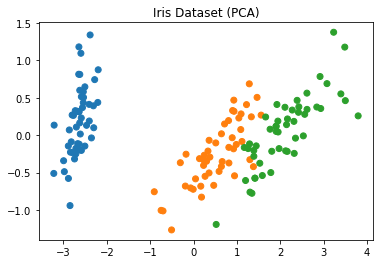

In [4]:
pca = PCA(n_components=2, random_state=1)
X_new = pca.fit_transform(X)
print('Transformed shape:', X_new.shape)

plt.title('Iris Dataset (PCA)')
plt.scatter(
    X_new[:, 0],
    X_new[:, 1],
    c=[colors[y_i] for y_i in y]
)

plt.show()

/home/ubuntu/miniconda3/envs/dimred/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ubuntu/miniconda3/envs/dimred/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


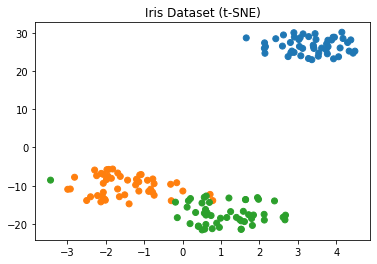

In [5]:
tsne = TSNE(n_components=2, random_state=2)
X_new = tsne.fit_transform(X)

plt.title('Iris Dataset (t-SNE)')
plt.scatter(
    X_new[:, 0],
    X_new[:, 1],
    c=[colors[y_i] for y_i in y]
)

plt.show()

# MNIST Handwritten Digits Dataset
This is a widely-used benchmark dataset of images of handwritten digits. Each digit is a 28x28 grayscale image.

First we'll load the data and visualize a few samples from it.

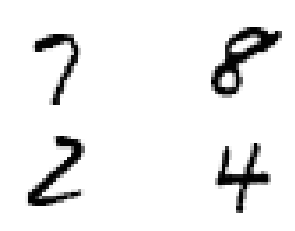

In [6]:
# Data loading code from here:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=10000, shuffle=True, random_state=3
)
y_train = list(map(int, y_train))


fig, axes = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        num = i*2 + j
        img = X_train[num,:].reshape(28, 28) / 255
        axes[i, j].set_axis_off()
        axes[i, j].imshow(img, cmap='Greys')

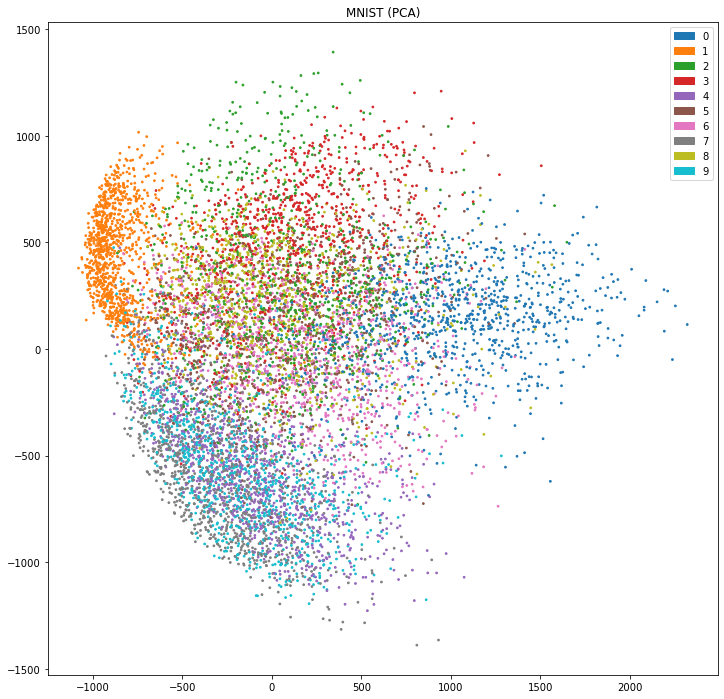

In [7]:
pca = PCA(n_components=2, random_state=4)
X_new = pca.fit_transform(X_train)

plt.title('MNIST (PCA)')
plt.scatter(
    X_new[:, 0],
    X_new[:, 1],
    c=[colors[y_i] for y_i in y_train],
    s=3
)

# Add legend using color patches
patches = [mpatches.Patch(color=colors[i], label=str(i)) for i in range(10)]
plt.legend(handles=patches)

fig = plt.gcf()
fig.set_size_inches(12, 12)

plt.show()

t-SNE plots with and without the classes being color-coded:

/home/ubuntu/miniconda3/envs/dimred/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ubuntu/miniconda3/envs/dimred/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.004s...
[t-SNE] Computed neighbors for 10000 samples in 4.747s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 519.696950
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.764023
[t-SNE] KL divergence after 1000 iterations: 1.817353


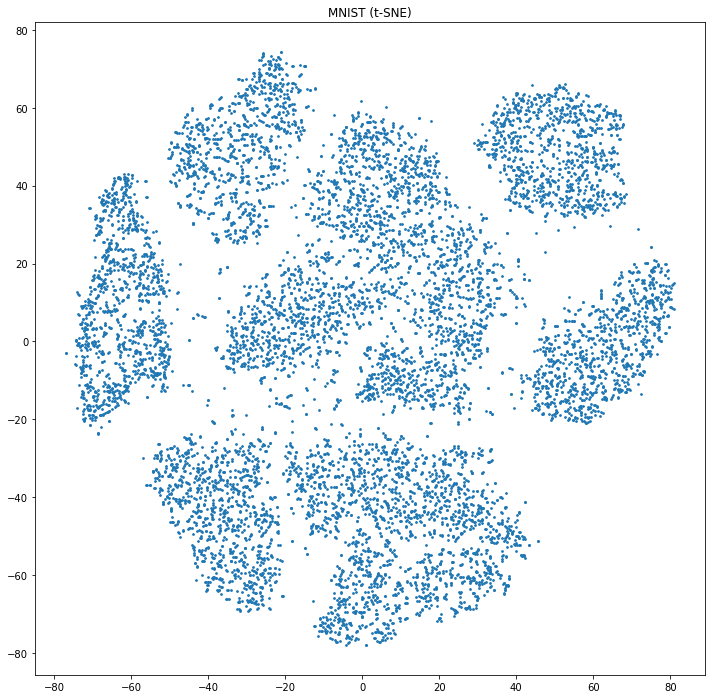

In [8]:
tsne = TSNE(n_components=2, random_state=5, n_jobs=-1, verbose=1)
X_new = tsne.fit_transform(X_train)

plt.title('MNIST (t-SNE)')
plt.scatter(
    X_new[:, 0],
    X_new[:, 1],
    c='tab:blue',
    s=3
)

fig = plt.gcf()
fig.set_size_inches(12, 12)

plt.show()

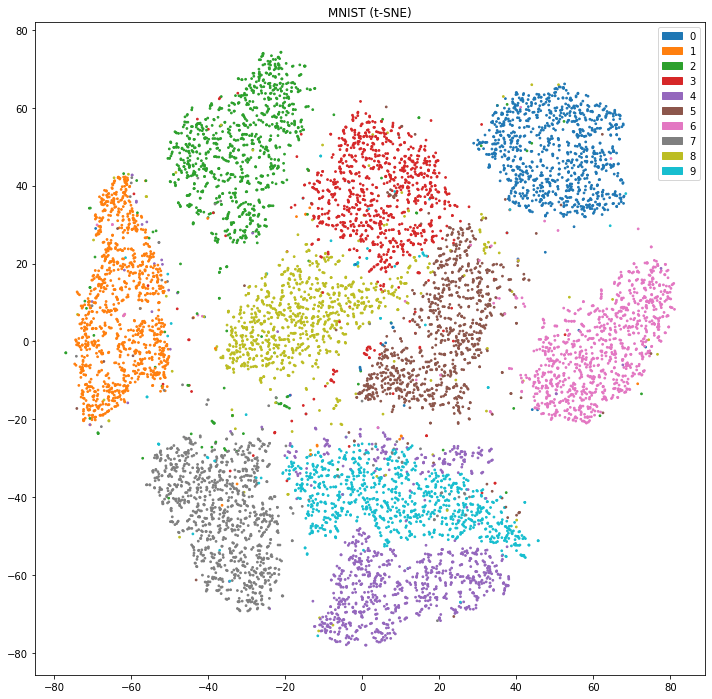

In [9]:
plt.title('MNIST (t-SNE)')
plt.scatter(
    X_new[:, 0],
    X_new[:, 1],
    c=[colors[y_i] for y_i in y_train],
    s=3
)

plt.legend(handles=patches)

fig = plt.gcf()
fig.set_size_inches(12, 12)

plt.show()

# Two Blobs
This dataset contains samples from two Gaussian distributions, where one has a larger standard deviation than the other.

In [10]:
X, y = make_blobs(n_samples=200, n_features=10, centers=2, cluster_std=[1.0, 0.3], random_state=6)
print('Data shape:', X.shape)

Data shape: (200, 10)


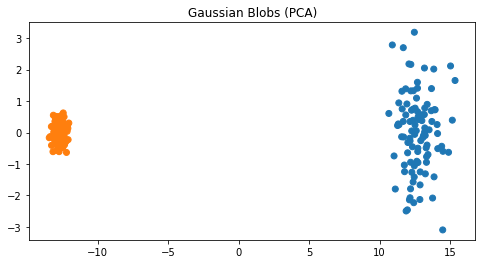

In [11]:
pca = PCA(n_components=2, random_state=7)
X_new = pca.fit_transform(X)

plt.title('Gaussian Blobs (PCA)')
plt.scatter(
    X_new[:, 0],
    X_new[:, 1],
    c=[colors[y_i] for y_i in y]
)

fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.show()

/home/ubuntu/miniconda3/envs/dimred/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ubuntu/miniconda3/envs/dimred/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


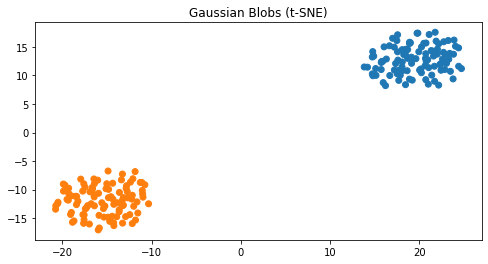

In [12]:
tsne = TSNE(n_components=2, random_state=8)
X_new = tsne.fit_transform(X)
plt.title('Gaussian Blobs (t-SNE)')
plt.scatter(
    X_new[:, 0],
    X_new[:, 1],
    c=[colors[y_i] for y_i in y]
)

fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.show()

PCA correctly displays the relative sizes of the blobs, while t-SNE expands the blobs to have about the same density. This is an example of t-SNE throwing away global information in favor of local structure.

# Blob Surrounded by Shell
This is a small blob of class 1, surrounded by a shell of class 2.

In [13]:
# What I'm actually doing is slicing a Gaussian blob into
# 4 concentric shells, then discarding the 2 middle ones.
X, y = make_gaussian_quantiles(n_samples=800, n_features=20, n_classes=4, random_state=9)
X_0 = X[y == 0, :]
X_3 = X[y == 3, :]
X = np.concatenate([X_0, X_3], axis=0)
y = ([0] * X_0.shape[0]) + ([1] * X_3.shape[0])

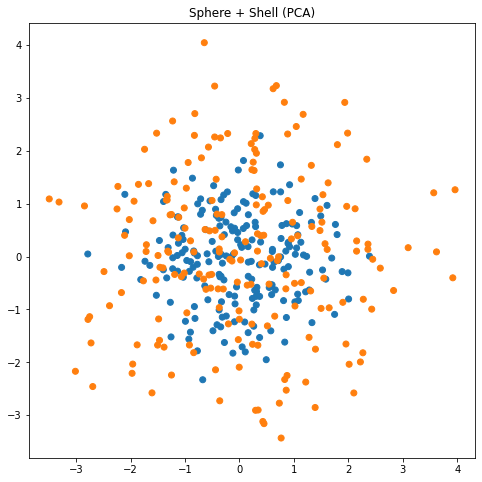

In [14]:
pca = PCA(n_components=2, random_state=10)
X_new = pca.fit_transform(X)

plt.title('Sphere + Shell (PCA)')
plt.scatter(
    X_new[:, 0],
    X_new[:, 1],
    c=[colors[y_i] for y_i in y]
)

fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.show()

Here, we illustrate the effect that perplexity can have on the resulting visualizations.

/home/ubuntu/miniconda3/envs/dimred/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ubuntu/miniconda3/envs/dimred/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ubuntu/miniconda3/envs/dimred/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ubuntu/miniconda3/envs/dimred/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


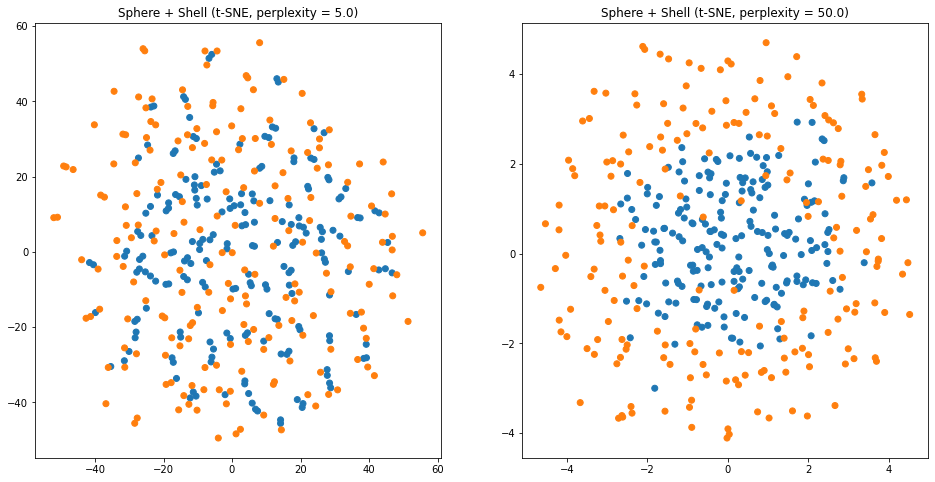

In [15]:
tsne_5 = TSNE(n_components=2, perplexity=5.0, random_state=11)
tsne_50 = TSNE(n_components=2, perplexity=50.0, random_state=12)

X_new_5 = tsne_5.fit_transform(X)
X_new_50 = tsne_50.fit_transform(X)

fig, [ax1, ax2] = plt.subplots(1, 2, squeeze=True)

# Plot perplexity=5
ax1.set_title('Sphere + Shell (t-SNE, perplexity = 5.0)')
ax1.scatter(
    X_new_5[:, 0],
    X_new_5[:, 1],
    c=[colors[y_i] for y_i in y]
)

# Plot perplexity=50
ax2.set_title('Sphere + Shell (t-SNE, perplexity = 50.0)')
ax2.scatter(
    X_new_50[:, 0],
    X_new_50[:, 1],
    c=[colors[y_i] for y_i in y]
)

fig.set_size_inches(16, 8)